# Plots for CPVT Patients on Beta Blockers

Also exports the tables into a csv for R to parse for Fisher's Exact Test in step 10

In [1]:
import pandas as pd
import os
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import yaml

from analysis.database import get_config

In [2]:

sns.set_style("ticks")

In [3]:
config = get_config()

# create dir for figures
figures_dir = Path(
    os.path.join("..", "figures", config.version_for_dir, "analysis_09"))

if not os.path.exists(figures_dir):
    print(f"Creating directory: {figures_dir}")
    os.makedirs(figures_dir)

In [4]:
def save_current_plot(name: str):
    for fmt in ["png", "pdf", "svg"]:
        plt.savefig(
            os.path.join(figures_dir / f"{name}.{fmt}"), dpi=300)

In [5]:
df = pd.read_excel(
    f"../data/individual_all_data-{config.version}.xlsx",
    index_col=0,
)
df.head()

,individual_id,sex,publication_id,title,first_author,reference,doi,year,publication_database,resource_uri,...,treatment_taken::Implantable cardioverter-defibrillator,treatment_taken::Left cardiac sympathetic denervation,treatment_taken::Verapamil,effective::Beta blocker,effective::Catheter ablation,effective::Enalapril,effective::Flecainide,effective::Implantable cardioverter-defibrillator,effective::Left cardiac sympathetic denervation,effective::Verapamil
0,1,NaN,1,Familial Evaluation in Catecholaminergic Polym...,Van Der Werf C,NaN,10.1161/CIRCEP.112.970517,2012,PubMed,https://pubmed.ncbi.nlm.nih.gov/22787013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,female,2,Flecainide therapy reduces exercise-induced ve...,"van der Werf, C",NaN,10.1016/j.jacc.2011.01.026,2011,PubMed,https://pubmed.ncbi.nlm.nih.gov/21616285,...,0.0,0.0,0.0,0.0,NaN,NaN,1.0,NaN,NaN,NaN
2,3,male,3,Structural abnormalities on cardiac magnetic r...,"Gerber, D",NaN,10.1016/j.jacep.2020.03.006,2020,PubMed,https://pubmed.ncbi.nlm.nih.gov/32553227,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,female,4,Genetic Background of Catecholaminergic Polymo...,"Kawamura, M",NaN,10.1253/circj.cj-12-1460,2013,PubMed,https://pubmed.ncbi.nlm.nih.gov/23595086,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,male,5,Gender differences in the inheritance mode of ...,"Ohno, S.",NaN,10.1371/journal.pone.0131517,2015,PubMed,https://pubmed.ncbi.nlm.nih.gov/26114861,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_cpvt = df[
    df["Catecholaminergic polymorphic ventricular tachycardia 1"] == 1
    ]
df_cpvt_bb = df_cpvt[
    df_cpvt["treatment_taken::Beta blocker"] == 1
    ].copy()

## Beta Blocker Patients

In [7]:
# get number of patients on each treatment
treatments = {
    # "Beta blocker": "Beta blocker",
    "Catheter ablation": "Catheter\nablation",
    "Enalapril": "Enalapril",
    "Flecainide": "Flecainide",
    "Implantable cardioverter-defibrillator": "ICD",
    "Left cardiac sympathetic denervation": "Left cardiac\nsympathetic\ndenervation",
    "Verapamil": "Verapamil"
}

treatment_nums = []

for treatment, plt_name in treatments.items():
    treatment_nums.append({
        "treatment": plt_name,
        "num_patients": df_cpvt_bb[f"treatment_taken::{treatment}"].sum()
    })

treatment_nums = pd.DataFrame(treatment_nums)
treatment_nums = treatment_nums.sort_values(by="num_patients", ascending=False)

treatment_nums

,treatment,num_patients
2,Flecainide,117.0
3,ICD,115.0
5,Verapamil,27.0
4,Left cardiac\nsympathetic\ndenervation,22.0
0,Catheter\nablation,10.0
1,Enalapril,2.0


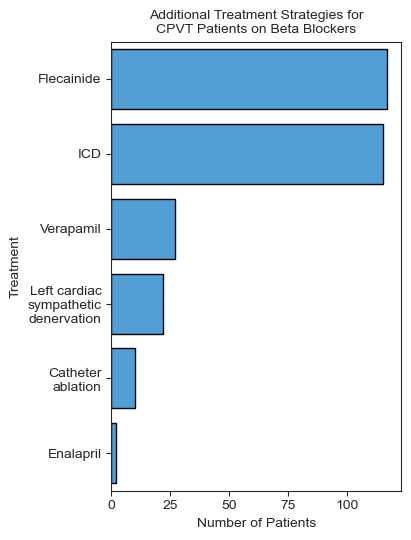

In [8]:
DEFAULT_COLOR = sns.color_palette("husl", 9)[6]
plt.figure(figsize=(2.125 * 2, 2.75 * 2))
ax = sns.barplot(data=treatment_nums, y="treatment", x="num_patients",
                 color=DEFAULT_COLOR, edgecolor="black", )

plt.xlabel("Number of Patients")
plt.ylabel("Treatment")
plt.title("Additional Treatment Strategies for\nCPVT Patients on Beta Blockers",
          fontsize=10)

# add_bar_labels(ax, direction="horizontal")

plt.tight_layout()

save_current_plot("treatment_strategies_all_cpvt")

plt.show()

## Export Data for R

Export tables to do Fisher's Exact Test in R

ORIGINAL: 

R420Q
R420W
G357S
G3946S
S2246L
G2337V

In [9]:
# only variants with more than 10 patients
variants_top_by_bb_usage = pd.DataFrame(df_cpvt_bb.groupby(
    "p_hgvs_string"
)["individual_id"].count().sort_values(ascending=False))

variants_top_by_bb_usage = variants_top_by_bb_usage[
    variants_top_by_bb_usage["individual_id"] > 10
    ]

variants_top_by_bb_usage.columns = ["Total"]
variants_top_by_bb_usage

,Total
p_hgvs_string,
NP_001026.2:p.(Gly357Ser),94
NP_001026.2:p.(Arg420Gln),24
NP_001026.2:p.Gly2337Val,21
NP_001026.2:p.(Arg420Trp),17
NP_001026.2:p.(Met3978Ile),14
NP_001026.2:p.(Gly3946Ser),11


In [10]:
# get the total number taking flecainide + beta blockers, beta blockers only, total in F + BB
for treatment, fish_name in {
    "Flecainide": "Flecainide",
    "Implantable cardioverter-defibrillator": "ICD",
}.items():
    treatment_and_bb = pd.DataFrame(df_cpvt_bb[
                                        (df_cpvt_bb[
                                             f"treatment_taken::{treatment}"] == 1)
                                        & df_cpvt_bb["p_hgvs_string"].isin(
                                            variants_top_by_bb_usage.index)
                                        ].groupby("p_hgvs_string")[
                                        "individual_id"].count())
    treatment_and_bb.columns = [f"{fish_name}_and_beta_blocker"]

    treatment_and_bb = treatment_and_bb.join(
        variants_top_by_bb_usage, how="outer"
    )

    treatment_and_bb.fillna(0, inplace=True)
    treatment_and_bb["beta_blocker_only"] = (
            treatment_and_bb["Total"] - treatment_and_bb[
        f"{fish_name}_and_beta_blocker"])

    # rearrange columns
    treatment_and_bb = treatment_and_bb[[
        f"{fish_name}_and_beta_blocker",
        "beta_blocker_only",
        "Total"
    ]]

    # remove index and sort by total
    treatment_and_bb.reset_index(inplace=True)
    treatment_and_bb = treatment_and_bb.sort_values(by="Total", ascending=False)

    display(treatment_and_bb)

    treatment_and_bb.to_csv(
        os.path.join(figures_dir / f"cpvt_{fish_name}_bb.csv"),
        index=False
    )

,p_hgvs_string,Flecainide_and_beta_blocker,beta_blocker_only,Total
2,NP_001026.2:p.(Gly357Ser),0.0,94.0,94
0,NP_001026.2:p.(Arg420Gln),2.0,22.0,24
5,NP_001026.2:p.Gly2337Val,0.0,21.0,21
1,NP_001026.2:p.(Arg420Trp),12.0,5.0,17
4,NP_001026.2:p.(Met3978Ile),9.0,5.0,14
3,NP_001026.2:p.(Gly3946Ser),2.0,9.0,11


,p_hgvs_string,ICD_and_beta_blocker,beta_blocker_only,Total
2,NP_001026.2:p.(Gly357Ser),1,93,94
0,NP_001026.2:p.(Arg420Gln),13,11,24
5,NP_001026.2:p.Gly2337Val,1,20,21
1,NP_001026.2:p.(Arg420Trp),5,12,17
4,NP_001026.2:p.(Met3978Ile),6,8,14
3,NP_001026.2:p.(Gly3946Ser),1,10,11
